# Classification model

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel(r"D:\project 6\Copper_Set.xlsx")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


# Input parameters:
item day
month
year
delivery day
month
year
quantity tons
customer
country
item type
appliation
thickness
width
product _ref
selling price

# output
Status

In [5]:
sorted(df['application'].unique())

[2.0,
 3.0,
 4.0,
 5.0,
 10.0,
 15.0,
 19.0,
 20.0,
 22.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 56.0,
 58.0,
 59.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 79.0,
 99.0,
 nan]

 Some rubbish values are present in ‘Material_Reference’ which starts with ‘00000’ value which should be converted into null. 
 
 Treat reference columns as categorical variables. 
 
 INDEX may not be useful.

 Handle missing values with mean/median/mode.

Treat Outliers using IQR or Isolation Forest from sklearn library.

Identify Skewness in the dataset and treat skewness with appropriate data transformations, such as log transformation(which is best suited to transform target variable-train, predict and then reverse transform it back to original scale eg:dollars), boxcox transformation, or other techniques, to handle high skewness in continuous variables.


Encode categorical variables using suitable techniques, such as one-hot encoding, label encoding, or ordinal encoding, based on their nature and relationship with the target variable.

Try visualizing outliers and skewness(before and after treating skewness) using Seaborn’s boxplot, distplot, violinplot.



In [6]:
#verify the  number of unique values in each feature
for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [7]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [8]:
#convert the data type from object to numeric
#The errors='coerce' parameter ensures that any non-convertible values are replaced with NaN instead of causing an error.
df['quantity tons']=pd.to_numeric(df['quantity tons'],errors='coerce')
df['item_date']=pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce').dt.date
df['delivery date']=pd.to_datetime(df['delivery date'],format='%Y%m%d',errors='coerce').dt.date
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [10]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [11]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [12]:
# drop material ref and id column
df.drop(columns=['id','material_ref'],inplace=True)
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [13]:
df.isnull().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [15]:
#Quantity and selling price min values below zero so convert to null
df['quantity tons']=df['quantity tons'].apply(lambda x:np.nan if (isinstance(x,(int,float)) and x<=0.0) else x)
df['selling_price']=df['selling_price'].apply(lambda x:np.nan if(isinstance(x,(int,float)) and x<=0.0) else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181668.0,5.875066e+03,2.349107e+06,0.00001,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181665.0,1.918124e+03,3.318020e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [16]:
df.isnull().sum()

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181670 non-null  object 
 1   quantity tons  181668 non-null  float64
 2   customer       181672 non-null  float64
 3   country        181645 non-null  float64
 4   status         181671 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181649 non-null  float64
 7   thickness      181672 non-null  float64
 8   width          181673 non-null  float64
 9   product_ref    181673 non-null  int64  
 10  delivery date  181670 non-null  object 
 11  selling_price  181665 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 16.6+ MB


The mode is the value that appears most frequently in a dataset.

The median is the middle value of a dataset when it is ordered from smallest to largest

In [18]:
df.head()


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [19]:
#mean of customer,country,application,thickness,
# selling_price,quantity tons

#calculate mean for each column
means=df[['customer','country','application','thickness','selling_price','quantity tons']].mean()

#fill empty rows with means
df_filled=df.fillna(means.to_dict())

df_filled.head()



,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [20]:
df_filled.isnull().sum()

item_date        3
quantity tons    0
customer         0
country          0
status           2
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    3
selling_price    0
dtype: int64

In [21]:
#now mode 
df_filled['delivery date']=df['delivery date'].fillna(df['delivery date']).mode()[0]
df_filled['status']=df['status'].fillna(df['status'].mode()[0])
df_filled['item_date']=df['item_date'].fillna(df['item_date'].mode()[0])


In [22]:
df_filled.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [23]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  object 
 1   quantity tons  181673 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  float64
 4   status         181673 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   product_ref    181673 non-null  int64  
 10  delivery date  181673 non-null  object 
 11  selling_price  181673 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 16.6+ MB


In [24]:
skewness=df_filled[['quantity tons','customer','country','application','thickness','width','product_ref','selling_price']].skew()
skewness

quantity tons    424.690816
customer          86.985308
country            0.753653
application        0.724407
thickness        303.447634
width              0.374597
product_ref        1.015216
selling_price    301.388088
dtype: float64

In [25]:
'''maximum skewness seen in quantity tons,customer,thickness,selling_price'''

'maximum skewness seen in quantity tons,customer,thickness,selling_price'

In [26]:
#use ordinal method to convert categorical data into numerical data
df_filled['item type']=OrdinalEncoder().fit_transform(df[['item type']])

In [27]:
df_filled.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [28]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

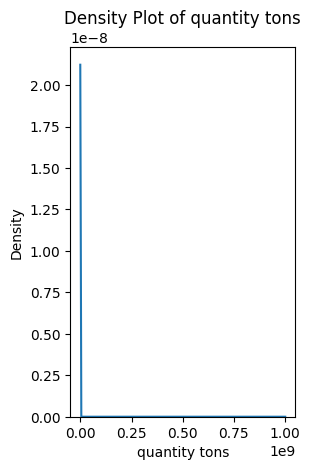

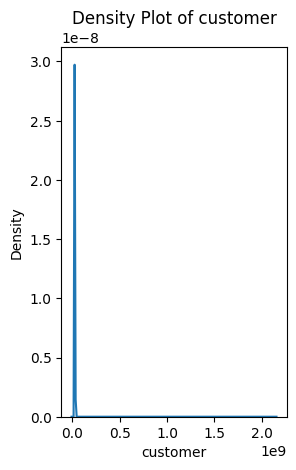

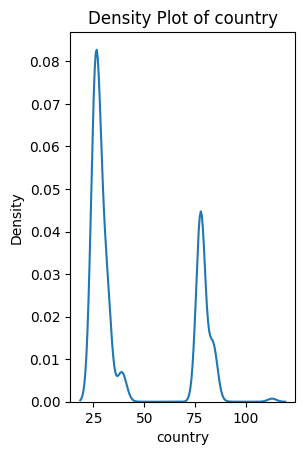

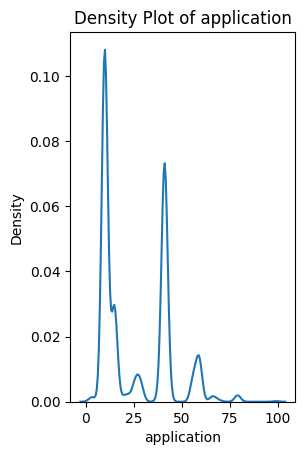

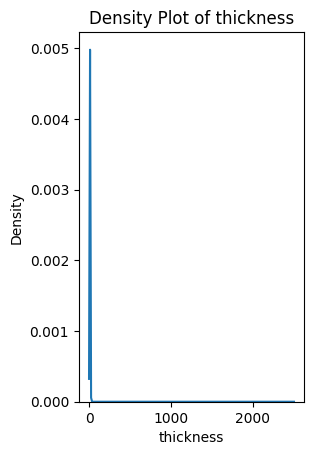

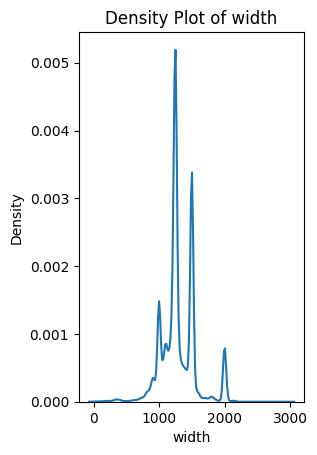

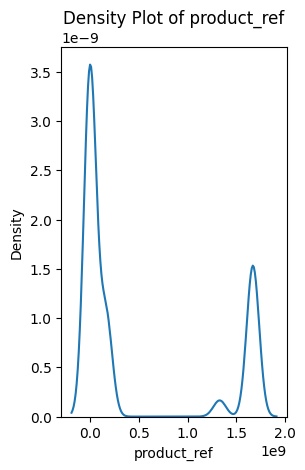

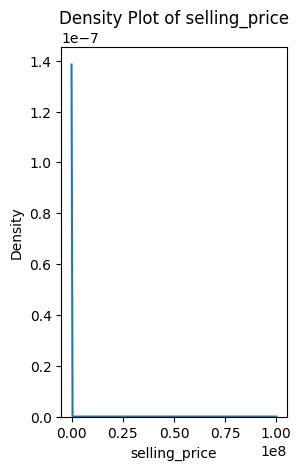

In [29]:
# Columns to visualize
columns_to_visualize = ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'selling_price']

# Visualize skewness using histograms and density plots
for column in columns_to_visualize:
    
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(df_filled[column])
    plt.title(f'Density Plot of {column}')
    
    plt.show()


In [30]:
df_filled.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [31]:
df_filled.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,5.0,10.0,2.00,1500.0,1670798778,2021-01-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,5.0,41.0,0.80,1210.0,1668701718,2021-01-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,5.0,10.0,4.00,2000.0,640665,2021-01-01,577.00


In [32]:
df_filled['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [33]:
df_filled['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [34]:
#find outliers - box plot
def plot(df,column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=column)
    plt.title(f'Box Plot for {column}')
    
    plt.show()
    

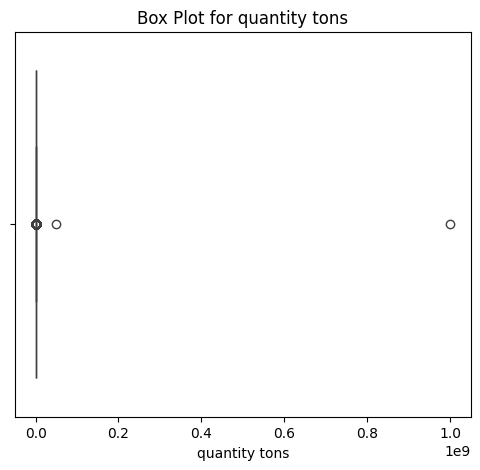

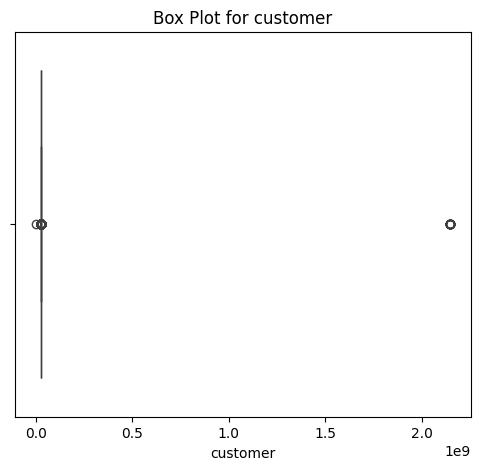

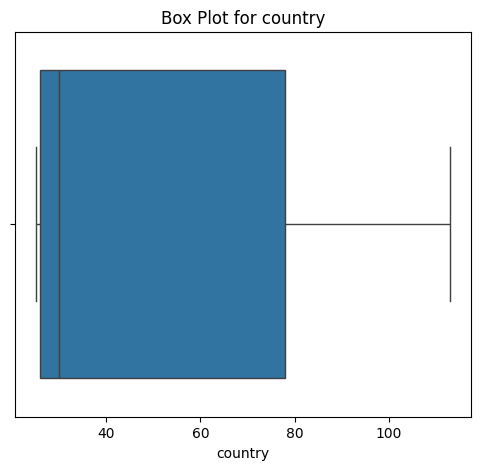

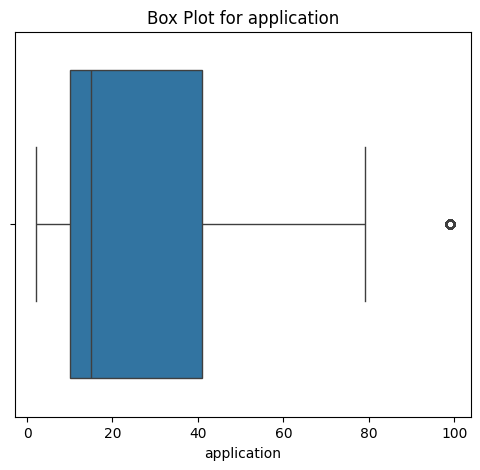

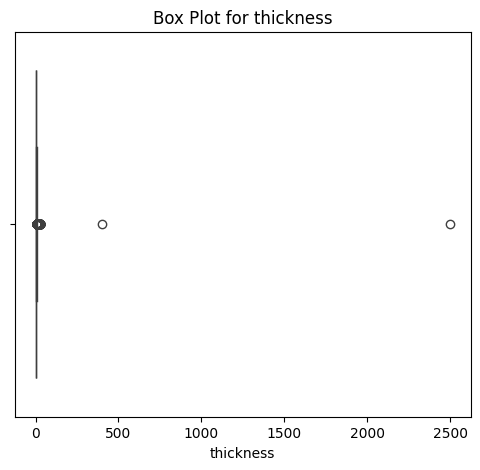

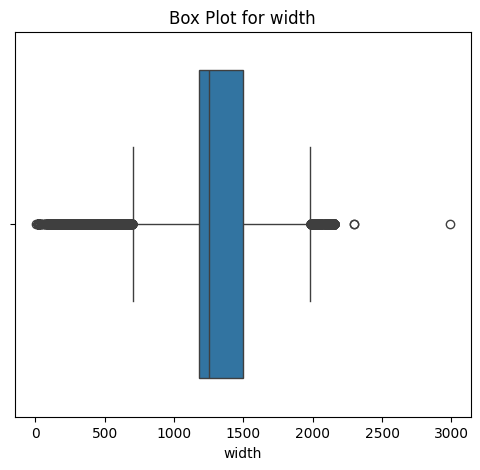

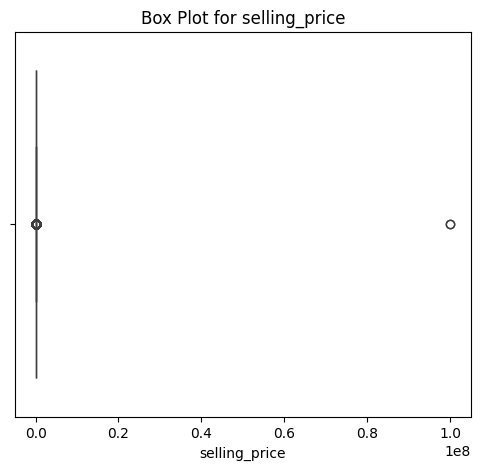

In [35]:
for i in ['quantity tons','customer','country','application','thickness','width','selling_price']:
    plot(df_filled,i)

outliers in 'quantity tons','customer','item type','application','thickness','width','selling_price'


In [36]:
'''maximum skewness seen in quantity tons,customer,thickness,selling_price'''

'maximum skewness seen in quantity tons,customer,thickness,selling_price'

In [37]:
df1=df_filled.copy()


In [38]:
df_filled['application'].unique()

array([10.        , 41.        , 28.        , 59.        , 15.        ,
        4.        , 38.        , 56.        , 42.        , 26.        ,
       27.        , 19.        , 20.        , 66.        , 29.        ,
       22.        , 40.        , 25.        , 67.        , 79.        ,
        3.        , 99.        ,  2.        ,  5.        , 39.        ,
       69.        , 70.        , 65.        , 58.        , 68.        ,
       25.61580851])

In [39]:
df_filled['customer'].unique()

array([30156308., 30202938., 30153963., ..., 30349515., 30284694.,
       30161559.])

In [40]:
df1['width'].unique()

array([1500., 1210.,  952., ..., 1831., 1741., 1786.])

In [41]:
'''maximum skewness seen in quantity tons,thickness,selling_price,width'''

'maximum skewness seen in quantity tons,thickness,selling_price,width'

In [42]:
df1['quantity tons']=pd.to_numeric(df1['quantity tons'],errors='coerce')
df1['thickness']=pd.to_numeric(df1['thickness'],errors='coerce')
df1['width']=pd.to_numeric(df1['width'],errors='coerce')
df1['selling_price']=pd.to_numeric(df1['selling_price'],errors='coerce')






In [43]:
df1['quantity_tons_log']=np.log1p(df1['quantity tons'])
df1['width_log']=np.log1p(df1['width'])
df1['thickness_log']=np.log1p(df1['thickness'])
df1['selling_price_log']=np.log1p(df1['selling_price'])

The error you're encountering typically happens when the columns you're trying to transform contain non-numeric values (e.g., strings). Before applying log transformations, ensure that the columns are numeric.

In [44]:
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons_log,width_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,5.0,10.0,2.00,1500.0,1670798778,2021-01-01,854.00,4.010077,7.313887,1.098612,6.751101
1,2021-04-01,768.024839,30202938.0,25.0,Won,5.0,41.0,0.80,1210.0,1668701718,2021-01-01,1047.00,6.645123,7.099202,0.587787,6.954639
2,2021-04-01,386.127949,30153963.0,30.0,Won,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,5.958755,6.859615,0.322083,6.469762
3,2021-04-01,202.411065,30349574.0,32.0,Won,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.315229,7.183871,1.193922,6.645091
4,2021-04-01,785.526262,30211560.0,28.0,Won,5.0,10.0,4.00,2000.0,640665,2021-01-01,577.00,6.667626,7.601402,1.609438,6.359574


In [45]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.875066e+03,2.349075e+06,0.000010,1.097167e+01,3.036556e+01,6.716871e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.000000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489302e+01,2.440233e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
item type,181673.0,4.133036e+00,1.055230e+00,0.000000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561581e+01,1.775300e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564827e+00,6.572303e+00,0.180000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918124e+03,3.317947e+05,0.100000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
quantity_tons_log,181673.0,3.474842e+00,1.329950e+00,0.000010,2.482543e+00,3.445710e+00,4.221986e+00,2.072327e+01


In [46]:
#outliers handling-interquartile range(method)

In [47]:
df2=df1.copy()

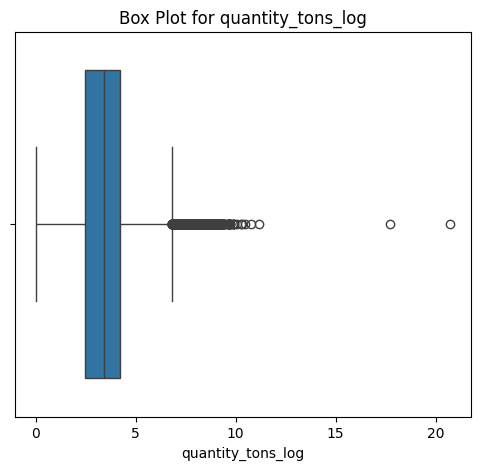

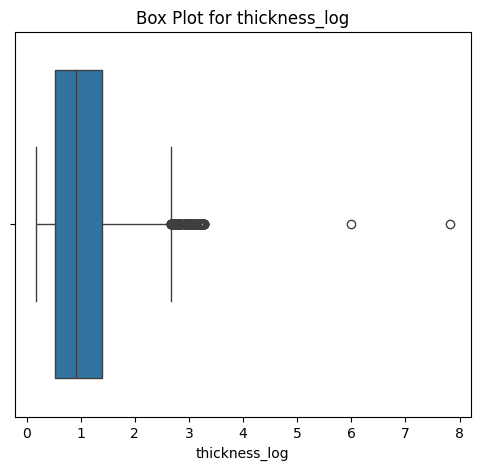

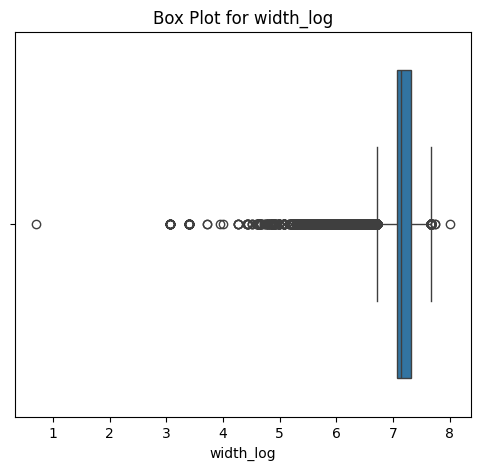

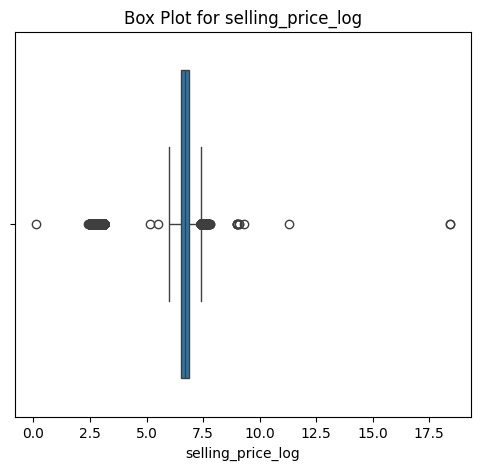

In [48]:
for i in ['quantity_tons_log', 'thickness_log', 'width_log', 'selling_price_log']:
    plot(df1, i)

In [49]:
#using iqr and clip() method to handle the outliers and 
# add a new column of dataframe

In [50]:
def outlier(df, column):
    # Calculate IQR
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    
    # Calculate thresholds
    upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    
    # Clip values outside the thresholds
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [51]:
outlier(df2,'quantity_tons_log')
outlier(df2,'width_log')
outlier(df2,'thickness_log')
outlier(df2,'selling_price_log')
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons_log,width_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,5.0,10.0,2.00,1500.0,1670798778,2021-01-01,854.00,4.010077,7.313887,1.098612,6.751101
1,2021-04-01,768.024839,30202938.0,25.0,Won,5.0,41.0,0.80,1210.0,1668701718,2021-01-01,1047.00,6.645123,7.099202,0.587787,6.954639
2,2021-04-01,386.127949,30153963.0,30.0,Won,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,5.958755,6.859615,0.322083,6.469762
3,2021-04-01,202.411065,30349574.0,32.0,Won,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.315229,7.183871,1.193922,6.645091
4,2021-04-01,785.526262,30211560.0,28.0,Won,5.0,10.0,4.00,2000.0,640665,2021-01-01,577.00,6.667626,7.601402,1.609438,6.359574


In [52]:
df2.dtypes

item_date             object
quantity tons        float64
customer             float64
country              float64
status                object
item type            float64
application          float64
thickness            float64
width                float64
product_ref            int64
delivery date         object
selling_price        float64
quantity_tons_log    float64
width_log            float64
thickness_log        float64
selling_price_log    float64
dtype: object

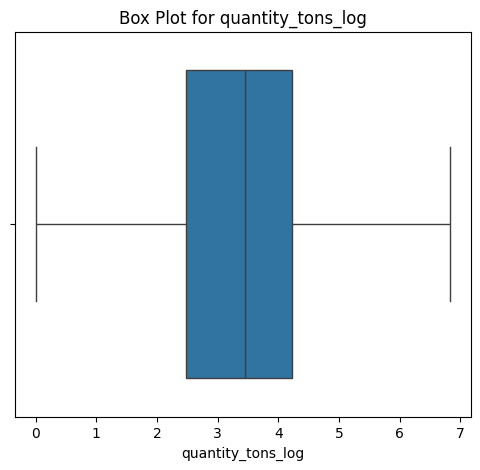

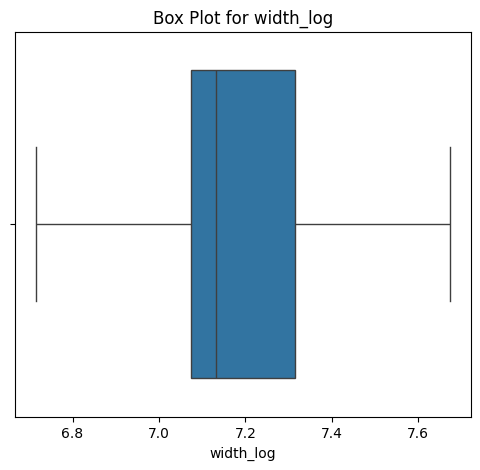

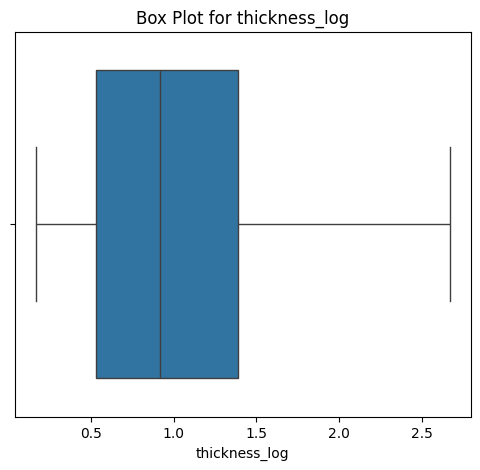

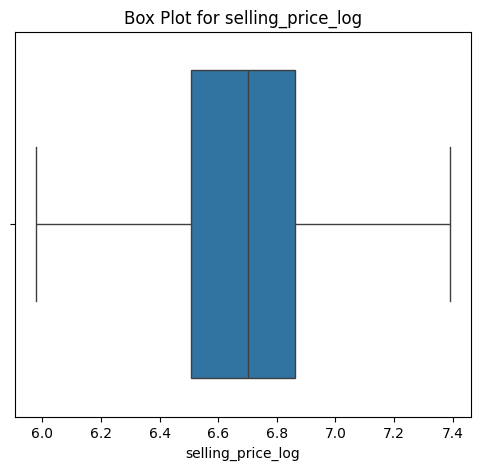

In [53]:
for i in ['quantity_tons_log','width_log','thickness_log','selling_price_log']:
    if i in df2.columns:
        
        plot(df2,i)

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   item_date          181673 non-null  object 
 1   quantity tons      181673 non-null  float64
 2   customer           181673 non-null  float64
 3   country            181673 non-null  float64
 4   status             181673 non-null  object 
 5   item type          181673 non-null  float64
 6   application        181673 non-null  float64
 7   thickness          181673 non-null  float64
 8   width              181673 non-null  float64
 9   product_ref        181673 non-null  int64  
 10  delivery date      181673 non-null  object 
 11  selling_price      181673 non-null  float64
 12  quantity_tons_log  181673 non-null  float64
 13  width_log          181673 non-null  float64
 14  thickness_log      181673 non-null  float64
 15  selling_price_log  181673 non-null  float64
dtypes:

In [55]:
df3=df2.drop(columns=['quantity tons','width','thickness','selling_price'])
df3

,item_date,customer,country,status,item type,application,product_ref,delivery date,quantity_tons_log,width_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,Won,5.0,10.0,1670798778,2021-01-01,4.010077,7.313887,1.098612,6.751101
1,2021-04-01,30202938.0,25.0,Won,5.0,41.0,1668701718,2021-01-01,6.645123,7.099202,0.587787,6.954639
2,2021-04-01,30153963.0,30.0,Won,6.0,28.0,628377,2021-01-01,5.958755,6.859615,0.322083,6.469762
3,2021-04-01,30349574.0,32.0,Won,3.0,59.0,1668701718,2021-01-01,5.315229,7.183871,1.193922,6.645091
4,2021-04-01,30211560.0,28.0,Won,5.0,10.0,640665,2021-01-01,6.667626,7.601402,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,30200854.0,25.0,Won,5.0,41.0,164141591,2021-01-01,4.639402,7.107425,0.672944,6.383507
181669,2020-07-02,30200854.0,25.0,Won,5.0,41.0,164141591,2021-01-01,5.342748,7.313887,0.667829,6.380123
181670,2020-07-02,30200854.0,25.0,Won,5.0,41.0,164141591,2021-01-01,1.655480,7.131699,0.536493,6.429719
181671,2020-07-02,30200854.0,25.0,Won,5.0,41.0,164141591,2021-01-01,6.831150,7.131699,0.615186,6.400257


In [56]:
df3.dtypes

item_date             object
customer             float64
country              float64
status                object
item type            float64
application          float64
product_ref            int64
delivery date         object
quantity_tons_log    float64
width_log            float64
thickness_log        float64
selling_price_log    float64
dtype: object

<Axes: >

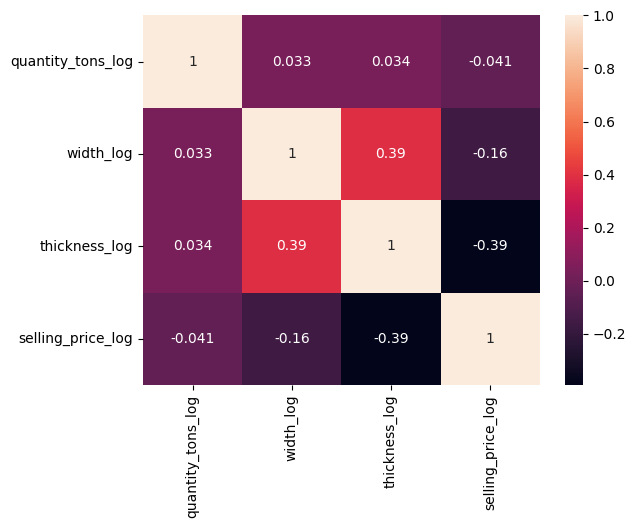

In [57]:
#use heatmap to verify correlation lesser than 0.7
col=['quantity_tons_log','width_log','thickness_log','selling_price_log']
df_heat=df3[col].corr()
sns.heatmap(df_heat,annot=True)

In [58]:
df3.head()

,item_date,customer,country,status,item type,application,product_ref,delivery date,quantity_tons_log,width_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,Won,5.0,10.0,1670798778,2021-01-01,4.010077,7.313887,1.098612,6.751101
1,2021-04-01,30202938.0,25.0,Won,5.0,41.0,1668701718,2021-01-01,6.645123,7.099202,0.587787,6.954639
2,2021-04-01,30153963.0,30.0,Won,6.0,28.0,628377,2021-01-01,5.958755,6.859615,0.322083,6.469762
3,2021-04-01,30349574.0,32.0,Won,3.0,59.0,1668701718,2021-01-01,5.315229,7.183871,1.193922,6.645091
4,2021-04-01,30211560.0,28.0,Won,5.0,10.0,640665,2021-01-01,6.667626,7.601402,1.609438,6.359574


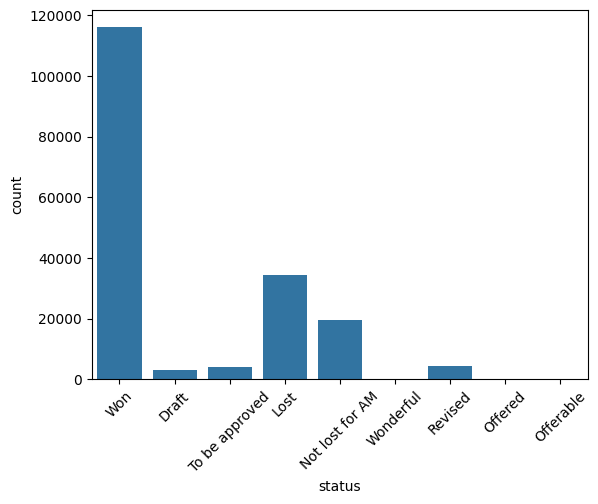

In [59]:
ax=sns.countplot(x='status',data=df3)
plt.xticks(rotation=45)
plt.show()

In [60]:
df4=df3.copy()

In [61]:
#filter dataframe to include only 'WON' and 'LOST' statuses
df4=df4[df4['status'].isin(['Won','Lost'])]

In [62]:
df4

,item_date,customer,country,status,item type,application,product_ref,delivery date,quantity_tons_log,width_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,Won,5.0,10.0,1670798778,2021-01-01,4.010077,7.313887,1.098612,6.751101
1,2021-04-01,30202938.0,25.0,Won,5.0,41.0,1668701718,2021-01-01,6.645123,7.099202,0.587787,6.954639
2,2021-04-01,30153963.0,30.0,Won,6.0,28.0,628377,2021-01-01,5.958755,6.859615,0.322083,6.469762
3,2021-04-01,30349574.0,32.0,Won,3.0,59.0,1668701718,2021-01-01,5.315229,7.183871,1.193922,6.645091
4,2021-04-01,30211560.0,28.0,Won,5.0,10.0,640665,2021-01-01,6.667626,7.601402,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,30200854.0,25.0,Won,5.0,41.0,164141591,2021-01-01,4.639402,7.107425,0.672944,6.383507
181669,2020-07-02,30200854.0,25.0,Won,5.0,41.0,164141591,2021-01-01,5.342748,7.313887,0.667829,6.380123
181670,2020-07-02,30200854.0,25.0,Won,5.0,41.0,164141591,2021-01-01,1.655480,7.131699,0.536493,6.429719
181671,2020-07-02,30200854.0,25.0,Won,5.0,41.0,164141591,2021-01-01,6.831150,7.131699,0.615186,6.400257


Delivery Date handling

In [63]:
df4.dtypes

item_date             object
customer             float64
country              float64
status                object
item type            float64
application          float64
product_ref            int64
delivery date         object
quantity_tons_log    float64
width_log            float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [64]:
df4['item_date']=pd.to_datetime(df4['item_date'])
df4['delivery date']=pd.to_datetime(df4['delivery date'])

In [65]:
#find the differnce between item and delivery date and add the new column of datafraame
df4['Date_difference']=(df4['delivery date']-df4['item_date']).dt.days 

#identify rows with negative date difference
negative_diiff_mask=df4['Date_difference']<0

#swap the dates for those rows
df4.loc[negative_diiff_mask,['delivery date','item_date']]=df4.loc[negative_diiff_mask,['item_date','delivery date']].values



In [66]:
# Recalculate Date_difference after swapping
df4['Date_difference'] = (df4['delivery date'] - df4['item_date']).dt.days

In [67]:
df4.head()

,item_date,customer,country,status,item type,application,product_ref,delivery date,quantity_tons_log,width_log,thickness_log,selling_price_log,Date_difference
0,2021-01-01,30156308.0,28.0,Won,5.0,10.0,1670798778,2021-04-01,4.010077,7.313887,1.098612,6.751101,90
1,2021-01-01,30202938.0,25.0,Won,5.0,41.0,1668701718,2021-04-01,6.645123,7.099202,0.587787,6.954639,90
2,2021-01-01,30153963.0,30.0,Won,6.0,28.0,628377,2021-04-01,5.958755,6.859615,0.322083,6.469762,90
3,2021-01-01,30349574.0,32.0,Won,3.0,59.0,1668701718,2021-04-01,5.315229,7.183871,1.193922,6.645091,90
4,2021-01-01,30211560.0,28.0,Won,5.0,10.0,640665,2021-04-01,6.667626,7.601402,1.609438,6.359574,90


In [68]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150450 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   item_date          150450 non-null  datetime64[ns]
 1   customer           150450 non-null  float64       
 2   country            150450 non-null  float64       
 3   status             150450 non-null  object        
 4   item type          150450 non-null  float64       
 5   application        150450 non-null  float64       
 6   product_ref        150450 non-null  int64         
 7   delivery date      150450 non-null  datetime64[ns]
 8   quantity_tons_log  150450 non-null  float64       
 9   width_log          150450 non-null  float64       
 10  thickness_log      150450 non-null  float64       
 11  selling_price_log  150450 non-null  float64       
 12  Date_difference    150450 non-null  int64         
dtypes: datetime64[ns](2), float64(8), int64(2), objec

In [69]:
df4['delivery_date_day']=df4['delivery date'].dt.day
df4['delivery_date_month']=df4['delivery date'].dt.month
df4['delivery_date_year']=df4['delivery date'].dt.year

df4['item_date_day']=df4['item_date'].dt.day
df4['item_date_month']=df4['item_date'].dt.month
df4['item_date_year']=df4['item_date'].dt.year

In [70]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150450 entries, 0 to 181672
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            150450 non-null  datetime64[ns]
 1   customer             150450 non-null  float64       
 2   country              150450 non-null  float64       
 3   status               150450 non-null  object        
 4   item type            150450 non-null  float64       
 5   application          150450 non-null  float64       
 6   product_ref          150450 non-null  int64         
 7   delivery date        150450 non-null  datetime64[ns]
 8   quantity_tons_log    150450 non-null  float64       
 9   width_log            150450 non-null  float64       
 10  thickness_log        150450 non-null  float64       
 11  selling_price_log    150450 non-null  float64       
 12  Date_difference      150450 non-null  int64         
 13  delivery_date_day  

In [71]:
df4['country'].unique()

array([ 28.       ,  25.       ,  30.       ,  32.       ,  38.       ,
        78.       ,  27.       ,  77.       , 113.       ,  79.       ,
        26.       ,  39.       ,  40.       ,  84.       ,  80.       ,
        89.       ,  44.8930221, 107.       ])

In [72]:
df4['status'].value_counts()

status
Won     116012
Lost     34438
Name: count, dtype: int64

In [73]:
df4['item type'].value_counts()

item type
5.0    91956
3.0    52467
2.0     5032
6.0      504
1.0      463
0.0       27
4.0        1
Name: count, dtype: int64

In [74]:
df4['product_ref'].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
       1665572032,  164337175,     611728, 1721130331, 1693867563,
           611733, 1690738219, 1722207579,  929423819, 1668701725,
       1665584320, 1665584642], dtype=int64)

In [75]:
df4['status']=df4['status'].map({'Won':1,'Lost':0})

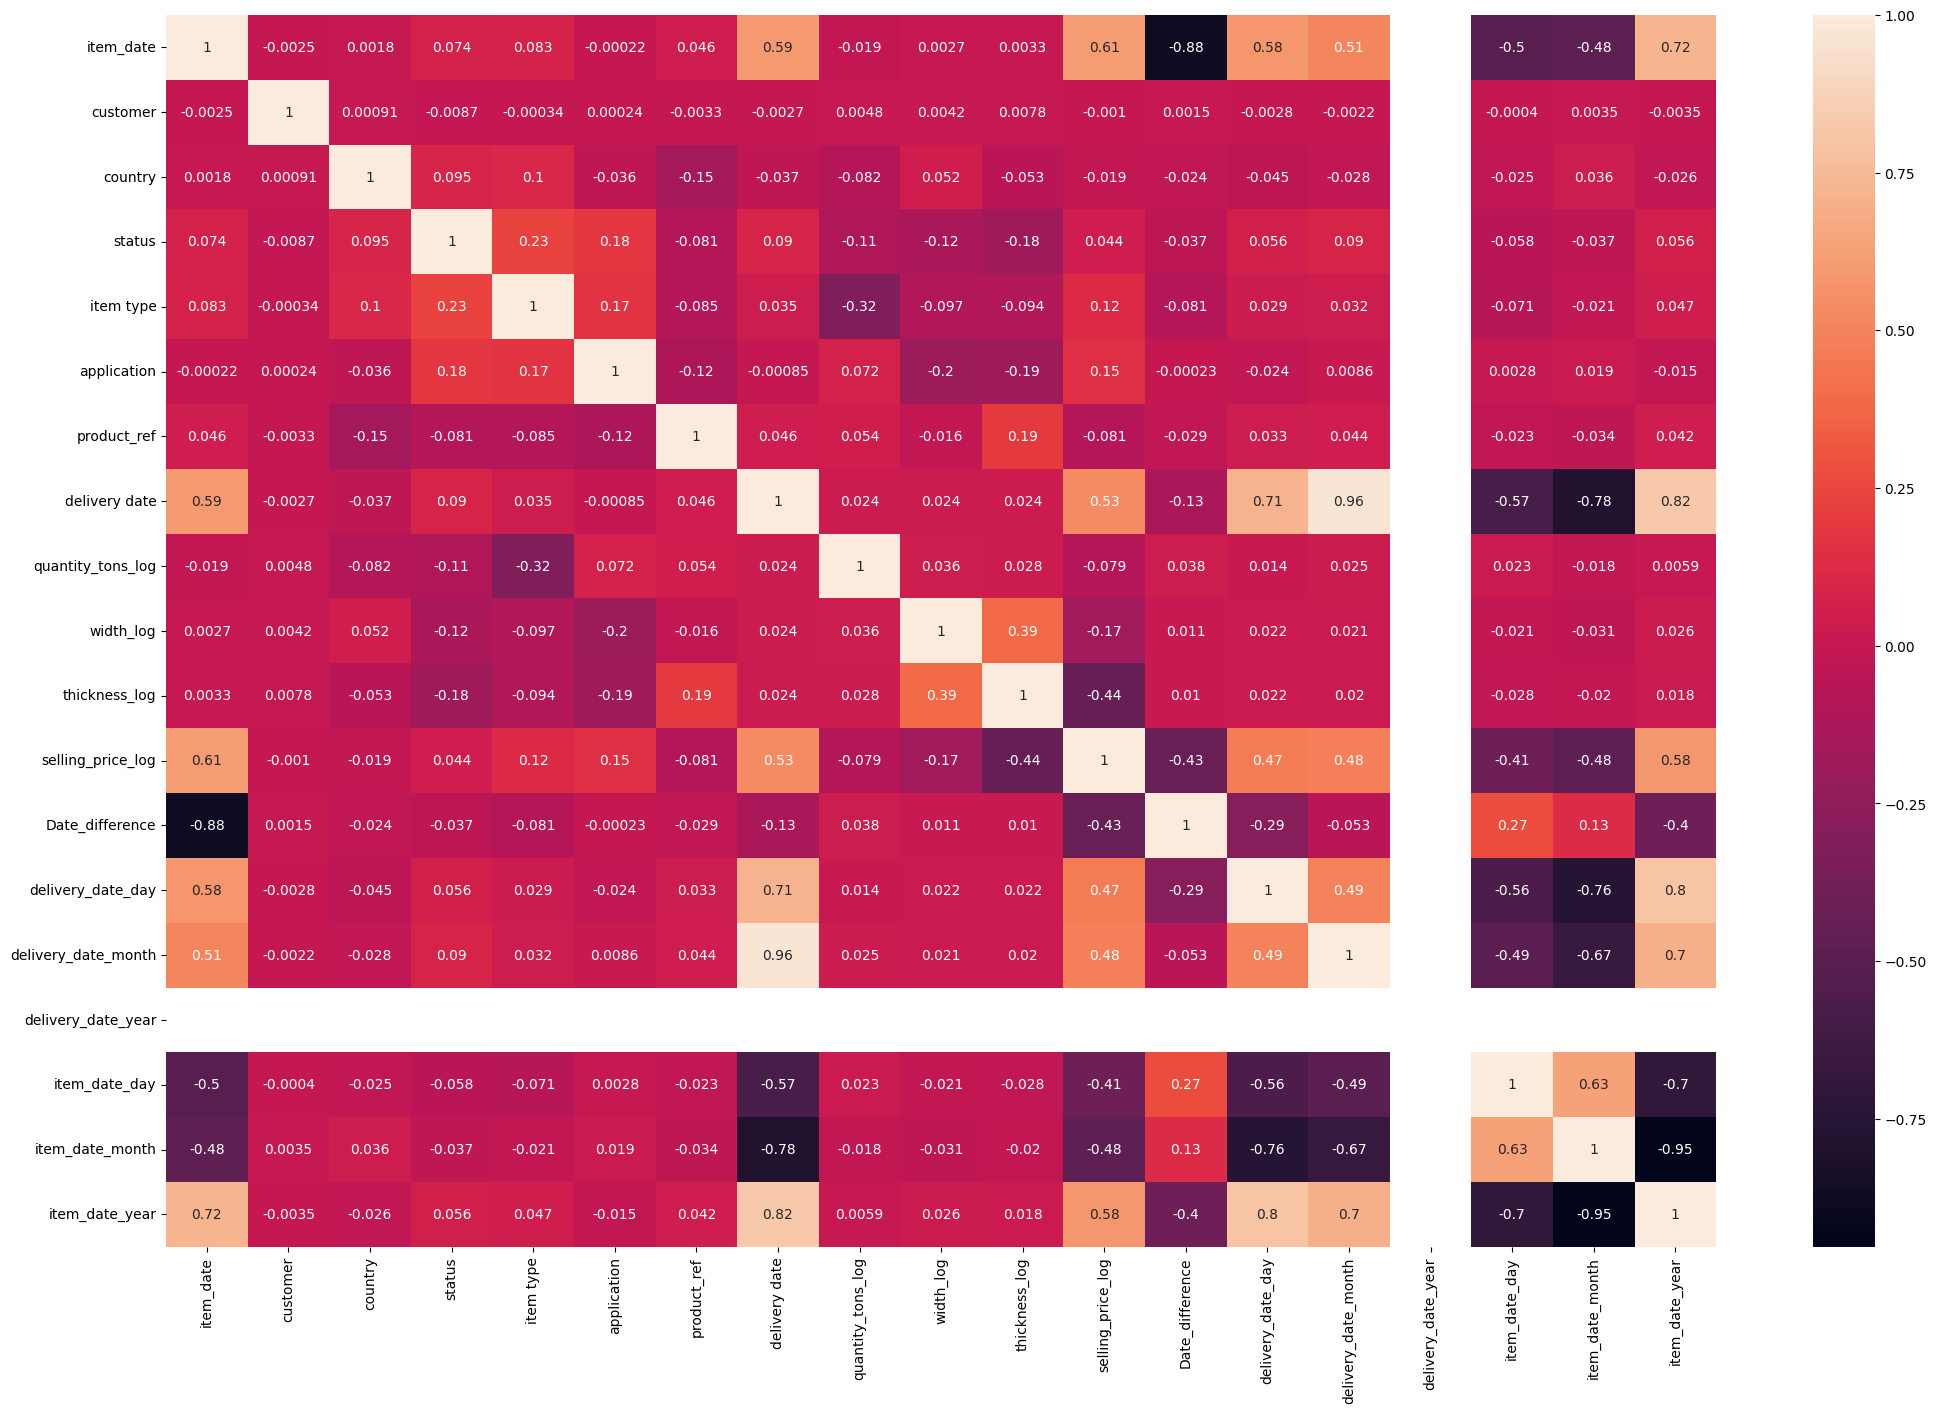

In [76]:
plt.figure(figsize=(25,16))
sns.heatmap(df4.corr(),annot=True)
plt.show()

In [77]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150450 entries, 0 to 181672
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            150450 non-null  datetime64[ns]
 1   customer             150450 non-null  float64       
 2   country              150450 non-null  float64       
 3   status               150450 non-null  int64         
 4   item type            150450 non-null  float64       
 5   application          150450 non-null  float64       
 6   product_ref          150450 non-null  int64         
 7   delivery date        150450 non-null  datetime64[ns]
 8   quantity_tons_log    150450 non-null  float64       
 9   width_log            150450 non-null  float64       
 10  thickness_log        150450 non-null  float64       
 11  selling_price_log    150450 non-null  float64       
 12  Date_difference      150450 non-null  int64         
 13  delivery_date_day  

In [78]:
X=df4.drop(columns=['item_date', 'delivery date','status','Date_difference'])
y=df4['status']

In [79]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [80]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [150]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [151]:
y.value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [152]:
y_resampled.value_counts()

status
1    116012
0    116012
Name: count, dtype: int64

In [153]:
y_resampled.value_counts()

status
1    116012
0    116012
Name: count, dtype: int64

In [154]:
def machine_classification(X_resampled,y_resampled,algorithm):
    X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=45)
    model=algorithm().fit(X_train,y_train)
    
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    
    accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    
    accuracy_metrics={'algorithm':algorithm.__name__,
                      'accuracy_train':accuracy_train,
                      'accuracy_test':accuracy_test}
    
    return accuracy_metrics

In [155]:
print(machine_classification(X_resampled, y_resampled, DecisionTreeClassifier))
print(machine_classification(X_resampled, y_resampled, ExtraTreesClassifier))
print(machine_classification(X_resampled, y_resampled, RandomForestClassifier))
print(machine_classification(X_resampled, y_resampled, AdaBoostClassifier))
print(machine_classification(X_resampled, y_resampled, GradientBoostingClassifier))
print(machine_classification(X_resampled, y_resampled, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9609955823725892}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.98036849477427}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9781920051718564}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.7564311843076409, 'accuracy_test': 0.7552849908415041}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.7992285272520593, 'accuracy_test': 0.7972416765434759}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9447901346306143, 'accuracy_test': 0.9364939122939339}


In [156]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=45)


[[23270     0]
 [    0 23135]]
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23270
           1       1.00      1.00      1.00     23135

    accuracy                           1.00     46405
   macro avg       1.00      1.00      1.00     46405
weighted avg       1.00      1.00      1.00     46405

---------------------------


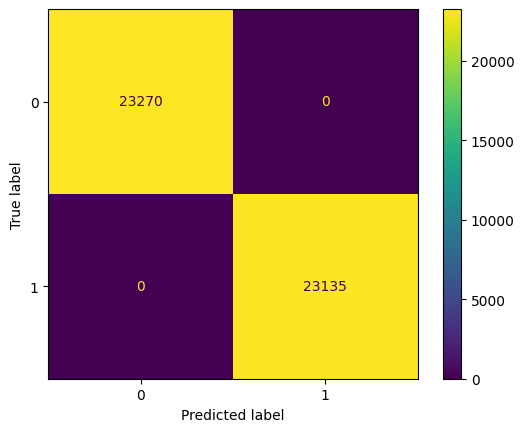

In [157]:
etc=ExtraTreesClassifier()
etc.fit(X_resampled,y_resampled)
y_pred=etc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('--------------------------')
print(classification_report(y_test,y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

[[23003   267]
 [  766 22369]]
--------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23270
           1       0.99      0.97      0.98     23135

    accuracy                           0.98     46405
   macro avg       0.98      0.98      0.98     46405
weighted avg       0.98      0.98      0.98     46405

---------------------------


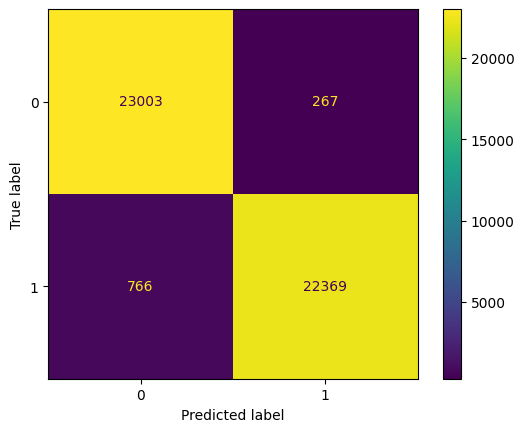

In [158]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('--------------------------')
print(classification_report(y_test,y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

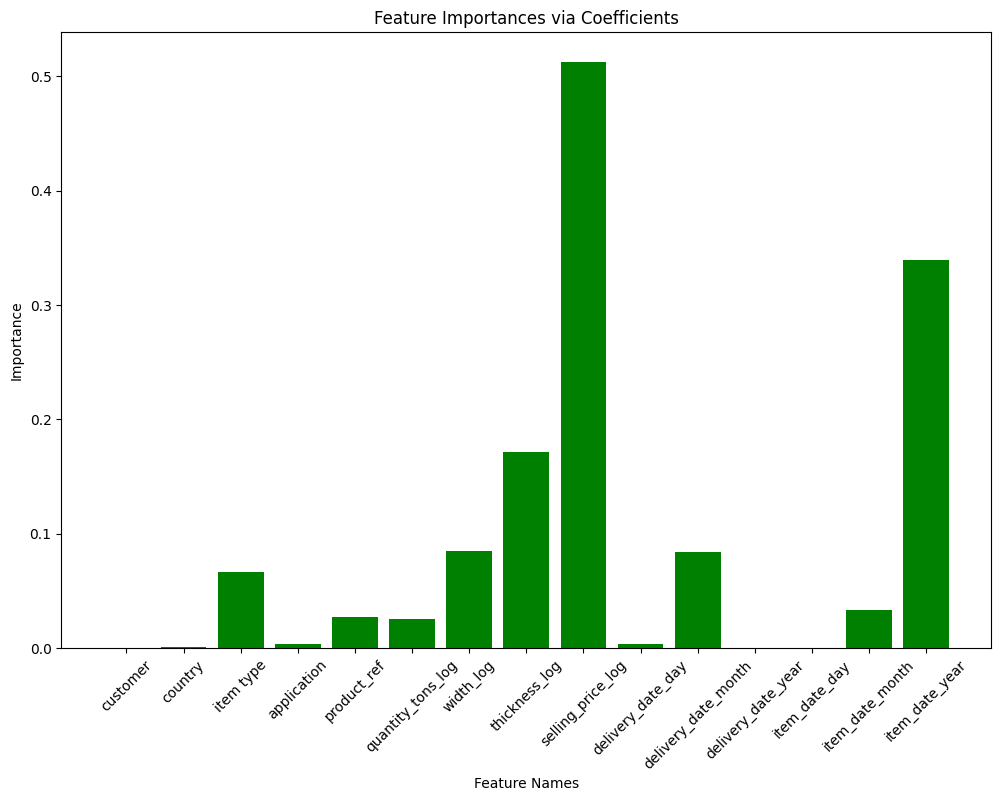

In [159]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)

plt.figure(figsize=(12, 8))  # Set the figure size to 12x8
bars = plt.bar(x=feature_names, height=importance, color='green')
plt.title("Feature Importances via Coefficients")
plt.xlabel("Feature Names")
plt.ylabel("Importance")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [160]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9777079963284208


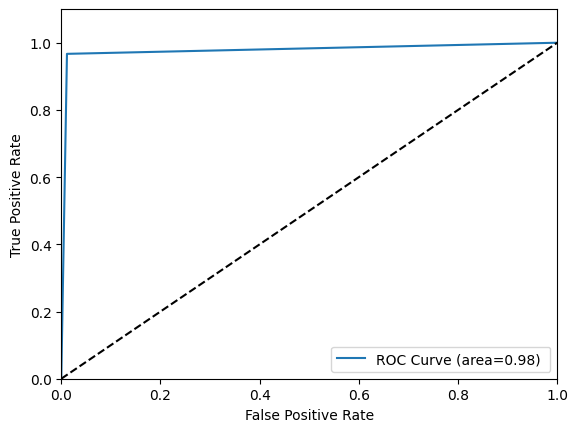

In [161]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [162]:
# save the classification model by using pickle

import pickle

with open('classification_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)


# regression model predict selling price

In [82]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [83]:
df4

,item_date,customer,country,status,item type,application,product_ref,delivery date,quantity_tons_log,width_log,thickness_log,selling_price_log,Date_difference,delivery_date_day,delivery_date_month,delivery_date_year,item_date_day,item_date_month,item_date_year
0,2021-01-01,30156308.0,28.0,1,5.0,10.0,1670798778,2021-04-01,4.010077,7.313887,1.098612,6.751101,90,1,4,2021,1,1,2021
1,2021-01-01,30202938.0,25.0,1,5.0,41.0,1668701718,2021-04-01,6.645123,7.099202,0.587787,6.954639,90,1,4,2021,1,1,2021
2,2021-01-01,30153963.0,30.0,1,6.0,28.0,628377,2021-04-01,5.958755,6.859615,0.322083,6.469762,90,1,4,2021,1,1,2021
3,2021-01-01,30349574.0,32.0,1,3.0,59.0,1668701718,2021-04-01,5.315229,7.183871,1.193922,6.645091,90,1,4,2021,1,1,2021
4,2021-01-01,30211560.0,28.0,1,5.0,10.0,640665,2021-04-01,6.667626,7.601402,1.609438,6.359574,90,1,4,2021,1,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,30200854.0,25.0,1,5.0,41.0,164141591,2021-01-01,4.639402,7.107425,0.672944,6.383507,183,1,1,2021,2,7,2020
181669,2020-07-02,30200854.0,25.0,1,5.0,41.0,164141591,2021-01-01,5.342748,7.313887,0.667829,6.380123,183,1,1,2021,2,7,2020
181670,2020-07-02,30200854.0,25.0,1,5.0,41.0,164141591,2021-01-01,1.655480,7.131699,0.536493,6.429719,183,1,1,2021,2,7,2020
181671,2020-07-02,30200854.0,25.0,1,5.0,41.0,164141591,2021-01-01,6.831150,7.131699,0.615186,6.400257,183,1,1,2021,2,7,2020


In [84]:
df4['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [85]:
df5=df4.copy()

In [86]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150450 entries, 0 to 181672
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            150450 non-null  datetime64[ns]
 1   customer             150450 non-null  float64       
 2   country              150450 non-null  float64       
 3   status               150450 non-null  int64         
 4   item type            150450 non-null  float64       
 5   application          150450 non-null  float64       
 6   product_ref          150450 non-null  int64         
 7   delivery date        150450 non-null  datetime64[ns]
 8   quantity_tons_log    150450 non-null  float64       
 9   width_log            150450 non-null  float64       
 10  thickness_log        150450 non-null  float64       
 11  selling_price_log    150450 non-null  float64       
 12  Date_difference      150450 non-null  int64         
 13  delivery_date_day  

In [87]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150450 entries, 0 to 181672
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            150450 non-null  datetime64[ns]
 1   customer             150450 non-null  float64       
 2   country              150450 non-null  float64       
 3   status               150450 non-null  int64         
 4   item type            150450 non-null  float64       
 5   application          150450 non-null  float64       
 6   product_ref          150450 non-null  int64         
 7   delivery date        150450 non-null  datetime64[ns]
 8   quantity_tons_log    150450 non-null  float64       
 9   width_log            150450 non-null  float64       
 10  thickness_log        150450 non-null  float64       
 11  selling_price_log    150450 non-null  float64       
 12  Date_difference      150450 non-null  int64         
 13  delivery_date_day  

In [88]:
df5['item type'].value_counts()

item type
5.0    91956
3.0    52467
2.0     5032
6.0      504
1.0      463
0.0       27
4.0        1
Name: count, dtype: int64

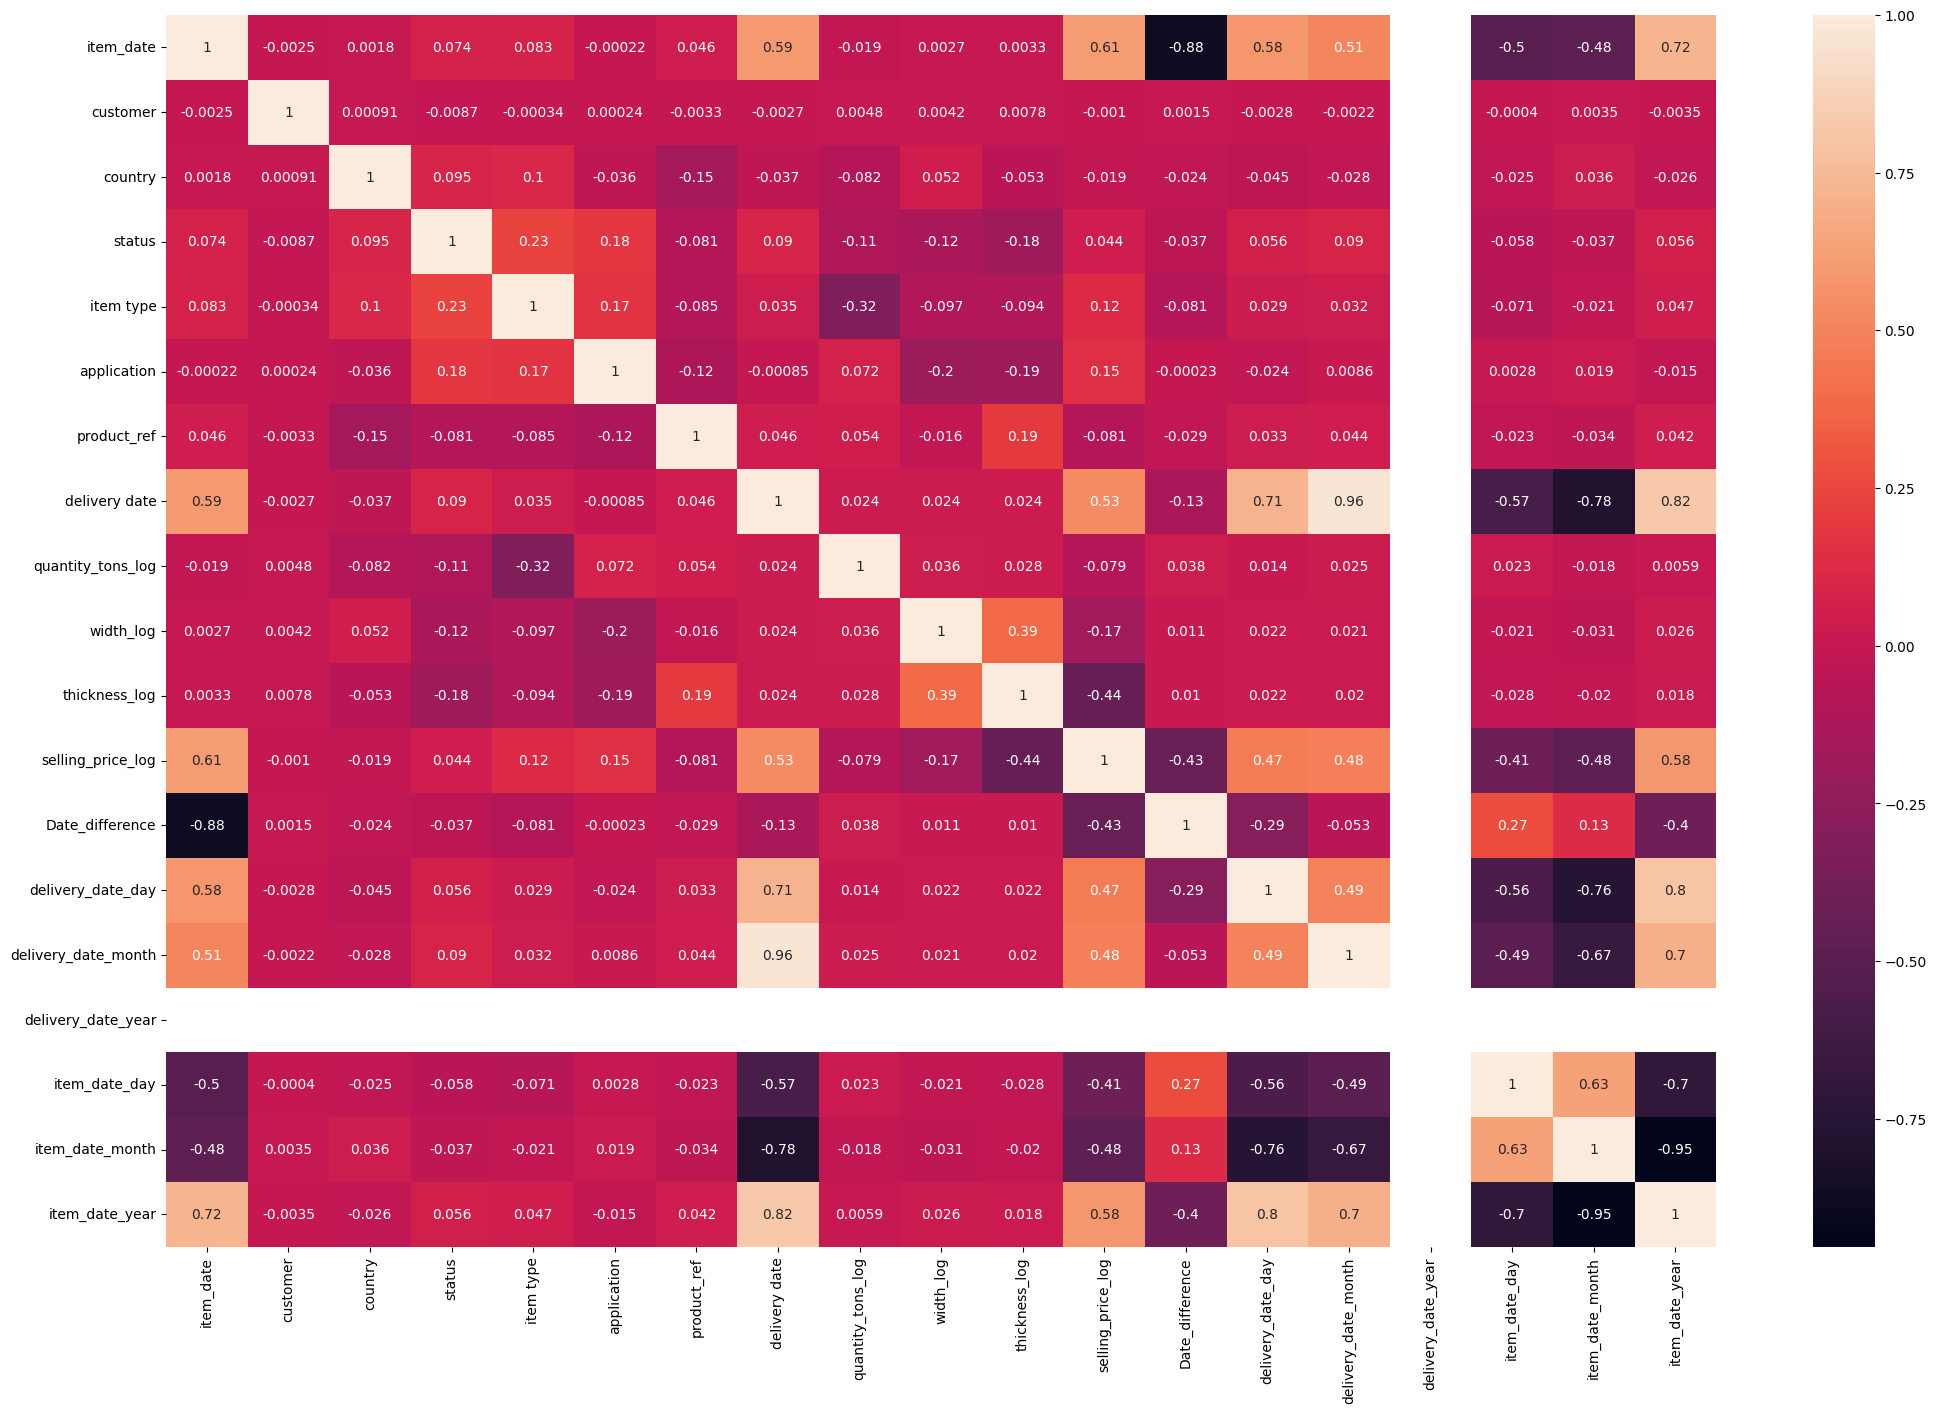

In [89]:
plt.figure(figsize=(25,16))
sns.heatmap(df5.corr(),annot=True)
plt.show()

In [90]:
df5.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'product_ref', 'delivery date', 'quantity_tons_log',
       'width_log', 'thickness_log', 'selling_price_log', 'Date_difference',
       'delivery_date_day', 'delivery_date_month', 'delivery_date_year',
       'item_date_day', 'item_date_month', 'item_date_year'],
      dtype='object')

In [97]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150450 entries, 0 to 181672
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            150450 non-null  datetime64[ns]
 1   customer             150450 non-null  float64       
 2   country              150450 non-null  float64       
 3   status               150450 non-null  int64         
 4   item type            150450 non-null  float64       
 5   application          150450 non-null  float64       
 6   product_ref          150450 non-null  int64         
 7   delivery date        150450 non-null  datetime64[ns]
 8   quantity_tons_log    150450 non-null  float64       
 9   width_log            150450 non-null  float64       
 10  thickness_log        150450 non-null  float64       
 11  selling_price_log    150450 non-null  float64       
 12  Date_difference      150450 non-null  int64         
 13  delivery_date_day  

In [98]:
def machine_algorithm(df,algorithm):
    
    X=df5.drop(columns=['item_date','delivery date','selling_price_log','Date_difference'],axis=1)
    y=df5['selling_price_log']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
    model=algorithm().fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    r2_test=r2_score(y_test,y_pred_test)
    
    accuracy_metrics={'algorithm':algorithm.__name__,
                      
                      'R2_test':r2_test}
    
    return accuracy_metrics

In [99]:
y.value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [100]:
print(machine_algorithm(df5, DecisionTreeRegressor))
print(machine_algorithm(df5, ExtraTreesRegressor))
print(machine_algorithm(df5, RandomForestRegressor))
print(machine_algorithm(df5, AdaBoostRegressor))
print(machine_algorithm(df5, GradientBoostingRegressor))
print(machine_algorithm(df5, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_test': 0.9209554985174633}
{'algorithm': 'ExtraTreesRegressor', 'R2_test': 0.9502230290673457}
{'algorithm': 'RandomForestRegressor', 'R2_test': 0.9541223700140297}
{'algorithm': 'AdaBoostRegressor', 'R2_test': 0.6952569371763635}
{'algorithm': 'GradientBoostingRegressor', 'R2_test': 0.8744671558447046}
{'algorithm': 'XGBRegressor', 'R2_test': 0.9366870950247042}


In [101]:
X=df5.drop(columns=['item_date','delivery date','selling_price_log','Date_difference'],axis=1)
y=df5['selling_price_log']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [102]:
from sklearn.experimental import enable_halving_search_cv  # noqa

from sklearn.model_selection import HalvingRandomSearchCV


In [103]:
param_grid={
    'n_estimators':[100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth':[10, 20, 30, None],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True,False]    
}

grid_search=HalvingRandomSearchCV(estimator=RandomForestRegressor(),param_distributions=param_grid, 
                                       factor=2, random_state=42, n_jobs=-1, verbose=2)
grid_search.fit(X_train,y_train)

print("Best patrameters:",grid_search.best_params_)
print(f"Best score:{grid_search.best_score_}")

n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 14
min_resources_: 10
max_resources_: 120360
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 288
n_resources: 10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
----------
iter: 1
n_candidates: 144
n_resources: 20
Fitting 5 folds for each of 144 candidates, totalling 720 fits
----------
iter: 2
n_candidates: 72
n_resources: 40
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 3
n_candidates: 36
n_resources: 80
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 4
n_candidates: 18
n_resources: 160
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 5
n_candidates: 9
n_resources: 320
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 6
n_candidates: 5
n_resources: 640
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 7
n_candidates: 3
n_resources: 1280

In [104]:
model=RandomForestRegressor(n_estimators= 300, min_samples_split=2, min_samples_leaf= 1, max_features='sqrt', max_depth=30, bootstrap= True).fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
r2_test=r2_score(y_test,y_pred_test)

In [105]:
r2_test

0.9533077717981346

In [106]:
# save the regression model by using pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)